# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# Data processing

In [3]:
df = pd.read_csv('/home/khangpt/MUSIC-GEN-PROJ/music_crawler/Dataset.csv')
def preprocess_(df):
    X = df.drop(['label'], axis = 1)
    y = df['label']

    df.label = pd.Categorical(df.label)
    y = np.array(df.label.cat.codes)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X, y
X, y = preprocess_(df)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

# Start from default model from sklearn

In [5]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [9]:
y_pred = svc.predict(X_test)

In [12]:
print('Confusion_matrix for default svm: \n')
print(confusion_matrix(y_test, y_pred))
print('\nMetrics to evaluate default svm:\n')
print(classification_report(y_test, y_pred))

Confusion_matrix for default svm: 

[[487  25  50  18   1  44   6   5  10  21]
 [ 20 621   1   0   1  19   1   4   0   0]
 [ 47   1 465  15   4  10   3  41  22  98]
 [ 31   1  30 375  47   3  16  69  25  20]
 [  7   0   7  32 455   1   5  39  51   5]
 [ 37  31   6   4   0 606   0   5   6   5]
 [ 16   9  14  16   7   0 516  19   8  80]
 [  6   2  47  40  56   5  20 337  48  32]
 [ 10   1  26  36  48   2   4  51 469   9]
 [ 54   6 130  30   6  10  88  33  28 236]]

Metrics to evaluate default svm:

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       667
           1       0.89      0.93      0.91       667
           2       0.60      0.66      0.63       706
           3       0.66      0.61      0.63       617
           4       0.73      0.76      0.74       602
           5       0.87      0.87      0.87       700
           6       0.78      0.75      0.77       685
           7       0.56      0.57      0.56       593
           

# Hyperparameter tuning

In [14]:
# Exhaustive search for best paramters
from sklearn.model_selection import GridSearchCV
temp_svc = SVC()
param_grid = {
    'C': [10, 100, 200, 500],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(estimator=temp_svc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [15]:
best_svc = SVC(C=200, kernel='rbf',gamma='scale')
best_svc.fit(X_train, y_train)
y_pred = best_svc.predict(X_test)

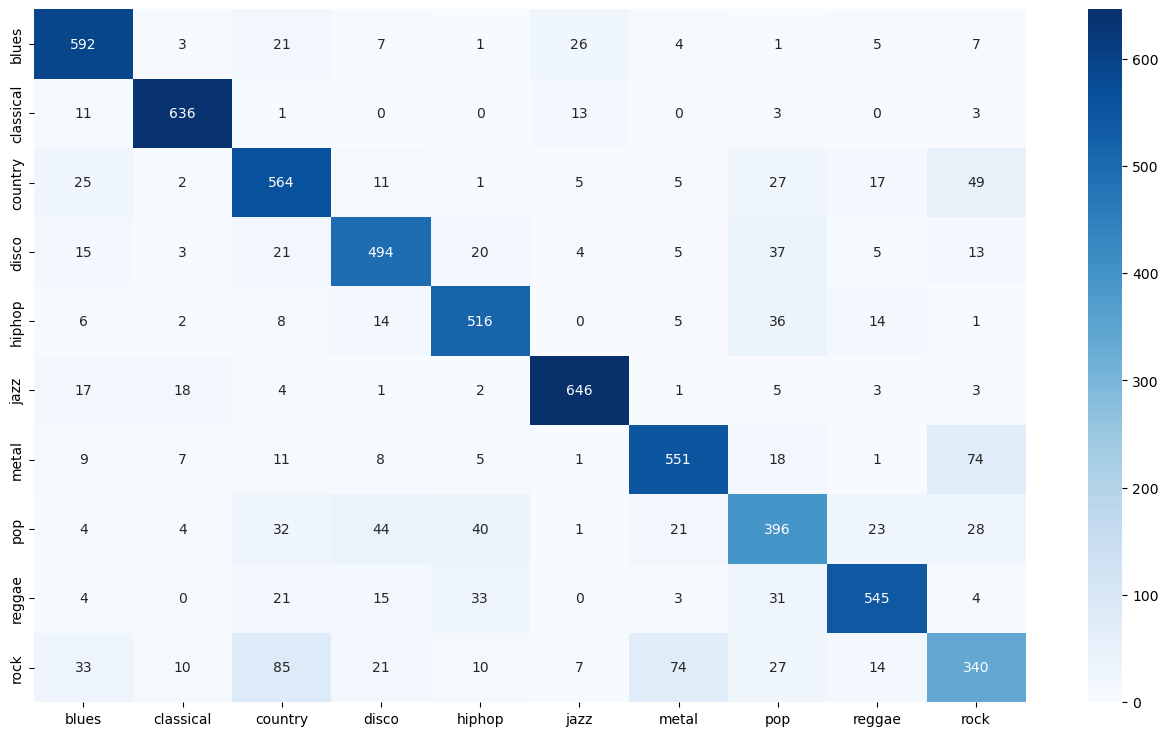

In [19]:
# Confusion Matrix
confusion_matr = confusion_matrix(y_test, y_pred) '
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr,fmt='d', cmap='Blues',annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       667
           1       0.93      0.95      0.94       667
           2       0.73      0.80      0.77       706
           3       0.80      0.80      0.80       617
           4       0.82      0.86      0.84       602
           5       0.92      0.92      0.92       700
           6       0.82      0.80      0.81       685
           7       0.68      0.67      0.67       593
           8       0.87      0.83      0.85       656
           9       0.65      0.55      0.59       621

    accuracy                           0.81      6514
   macro avg       0.81      0.81      0.81      6514
weighted avg       0.81      0.81      0.81      6514



In [18]:
import os 
import pickle

if os.path.exists('../saved_model/svm_model.pkl'):
    os.remove('../saved_model/svm_model.pkl')
with open('../saved_model/svm_model.pkl','wb') as file:
    pickle.dump(best_svc, file)